# load package

In [1]:
##import package
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline


# load and view set

In [2]:
training = pd.read_csv("train.csv")
testing = pd.read_csv("test.csv")

In [3]:
print(training.keys())
print(testing.keys())

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


# dealing with NaN Values (Imputation)

In [4]:
def null_table(training, testing):
    print("Training Data Frame")
    print(pd.isnull(training).sum())
    print(" ")
    print("Testing Data Frame")
    print(pd.isnull(testing).sum())
    
null_table(training, testing)

Training Data Frame
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
 
Testing Data Frame
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [5]:
training.drop(labels = ["Cabin", "Ticket"], axis = 1, inplace = True)
testing.drop(labels = ["Cabin", "Ticket"], axis = 1, inplace = True)

In [6]:
null_table(training, testing)

Training Data Frame
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64
 
Testing Data Frame
PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64


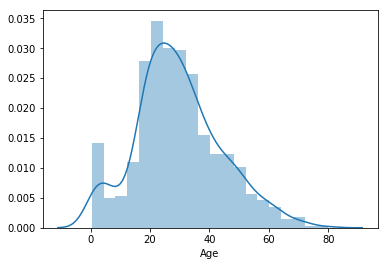

In [7]:
# check the distribution of the Age
copy = training.copy()
copy.dropna(inplace = True)
sns.distplot(copy["Age"])

In [8]:
copy.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,258.683191,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,677.250000,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [9]:
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
training["Age"].fillna(training["Age"].median(), inplace = True)

In [11]:
testing["Age"].fillna(testing["Age"].median(), inplace = True)

In [12]:
null_table(training, testing)

Training Data Frame
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64
 
Testing Data Frame
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
dtype: int64


In [13]:
training["Embarked"].fillna("S", inplace = True)
testing["Fare"].fillna(testing["Fare"].median(), inplace = True)

In [14]:
null_table(training, testing)

Training Data Frame
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64
 
Testing Data Frame
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


# plotting and Visuaiazing Data

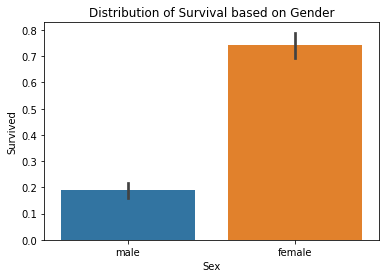

In [15]:
# Gender

sns.barplot(x = "Sex", y = "Survived", data = training)
plt.title("Distribution of Survival based on Gender")


total_survived_females = training[training.Sex == 'female'].Survived.sum()
total_survived_males = training[training.Sex == 'male'].Survived.sum()

In [16]:
print("Total people survived is " + str(total_survived_females + total_survived_males))
print("Total people survived femal is " + str(total_survived_females))
print("Total people survived male is " + str(total_survived_males))

Total people survived is 342
Total people survived femal is 233
Total people survived male is 109


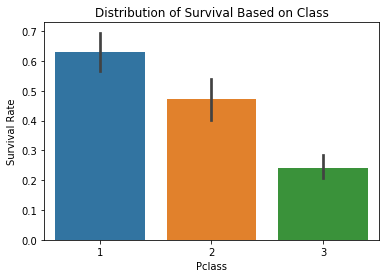

In [17]:
# Class
sns.barplot(x='Pclass', y = "Survived", data = training)
plt.ylabel("Survival Rate")
plt.title("Distribution of Survival Based on Class")
plt.show()

In [18]:
total_survived_firstClass = training[training.Pclass == 1].Survived.sum()
total_survived_secondClass = training[training.Pclass == 2].Survived.sum()
total_survived_thirdClass = training[training.Pclass == 3].Survived.sum()

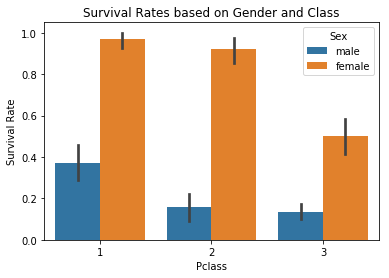

In [19]:
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=training)
plt.ylabel("Survival Rate")
plt.title("Survival Rates based on Gender and Class")
plt.show()

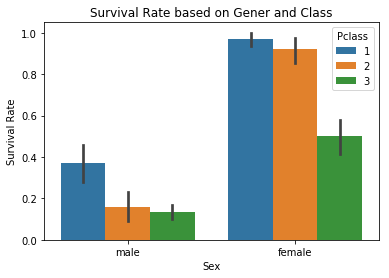

In [20]:
sns.barplot(x="Sex", y = "Survived", hue = "Pclass", data=training)
plt.ylabel("Survival Rate")
plt.title("Survival Rate based on Gener and Class")
plt.show()

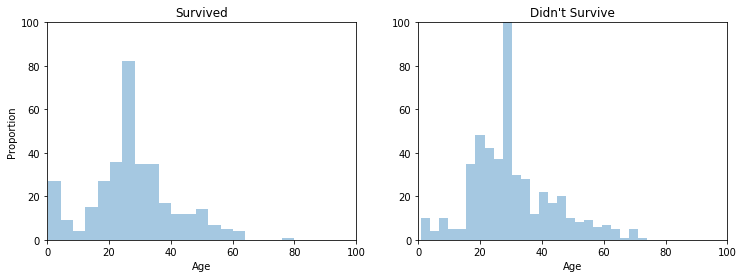

In [21]:
#Age
survived_ages = training[training.Survived == 1]["Age"]
not_survived_ages = training[training.Survived == 0]["Age"]
plt.subplot(1, 2, 1)
sns.distplot(survived_ages, kde=False)
plt.axis([0, 100, 0, 100])
plt.title("Survived")
plt.ylabel("Proportion")
plt.subplot(1, 2, 2)
sns.distplot(not_survived_ages, kde=False)
plt.axis([0, 100, 0, 100])
plt.title("Didn't Survive")
plt.subplots_adjust(right=1.7)
plt.show()

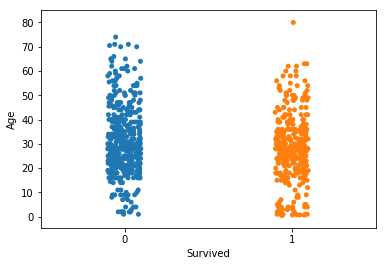

In [22]:
sns.stripplot(x="Survived", y="Age", data = training)

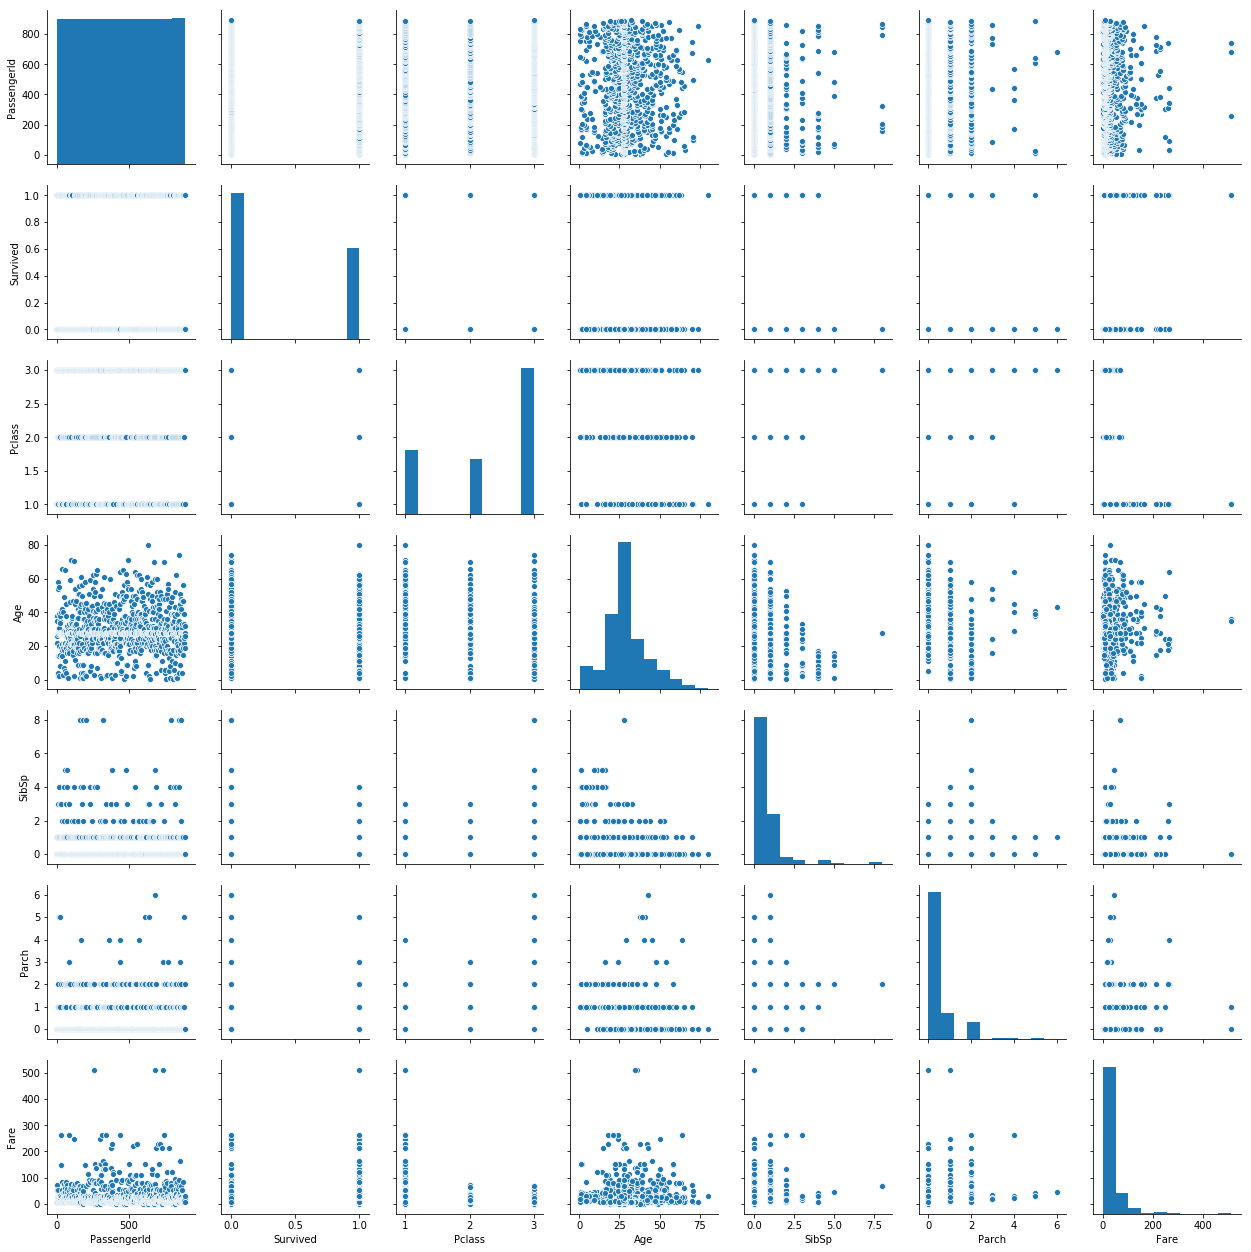

In [23]:
sns.pairplot(training)
plt.show()

# feature engineering

In [24]:
training.loc[training["Sex"] == "male", "Sex"] = 0
training.loc[training["Sex"] == "female", "Sex"] = 1

training.loc[training["Embarked"] == "S", "Embarked"] = 0
training.loc[training["Embarked"] == "C", "Embarked"] = 1
training.loc[training["Embarked"] == "Q", "Embarked"] = 2


testing.loc[testing["Sex"] == "male", "Sex"] = 0
testing.loc[testing["Sex"] == "female", "Sex"] = 1

testing.loc[testing["Embarked"] == "S", "Embarked"] = 0
testing.loc[testing["Embarked"] == "C", "Embarked"] = 1
testing.loc[testing["Embarked"] == "Q", "Embarked"] = 2

In [25]:
training.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
800,801,0,2,"Ponesell, Mr. Martin",0,34.0,0,0,13.0000,0
234,235,0,2,"Leyson, Mr. Robert William Norman",0,24.0,0,0,10.5000,0
11,12,1,1,"Bonnell, Miss. Elizabeth",1,58.0,0,0,26.5500,0
485,486,0,3,"Lefebre, Miss. Jeannie",1,28.0,3,1,25.4667,0
675,676,0,3,"Edvardsson, Mr. Gustaf Hjalmar",0,18.0,0,0,7.7750,0


In [26]:
training["Fsize"] = training["SibSp"] + training["Parch"] + 1
testing["Fsize"] = testing["SibSp"] + testing["Parch"] + 1

In [27]:
training["IsAlone"] = training.Fsize.apply(lambda x:1 if x == 1 else 0)
testing["IsAlone"] = testing.Fsize.apply(lambda x:1 if x == 1 else 0)

In [28]:
for name in training["Name"]:
    training["Title"] = training["Name"].str.extract("([A-Za-z]+)\.", expand = True)
    
for name in testing["Name"]:
    testing["Title"] = testing["Name"].str.extract("([A-Za-z]+)\.", expand = True)

In [29]:
titles = set(training.Title)
print(titles)

{'Major', 'Mlle', 'Mme', 'Countess', 'Sir', 'Rev', 'Dr', 'Ms', 'Mrs', 'Master', 'Miss', 'Col', 'Capt', 'Jonkheer', 'Mr', 'Lady', 'Don'}


In [30]:
title_list = list(training.Title)
titles = set(title_list)
frequency = []
for i in titles:
    frequency.append(title_list.count(i))
    
print(frequency)

[2, 2, 1, 1, 1, 6, 7, 1, 125, 40, 182, 2, 1, 1, 517, 1, 1]


In [31]:
titles = list(titles)
title_dataframe = pd.DataFrame({
    "Titles" : titles,
    "Frequency" : frequency
})
title_dataframe

,Frequency,Titles
0,2,Major
1,2,Mlle
2,1,Mme
3,1,Countess
4,1,Sir
5,6,Rev
6,7,Dr
7,1,Ms
8,125,Mrs
9,40,Master


In [32]:
title_replacements = {"Mlle": "Other", "Major": "Other", "Col": "Other", "Sir": "Other", "Don": "Other", "Mme": "Other",
          "Jonkheer": "Other", "Lady": "Other", "Capt": "Other", "Countess": "Other", "Ms": "Other", "Dona": "Other"}

training.replace({"Title": title_replacements}, inplace=True)
testing.replace({"Title": title_replacements}, inplace=True)

training.loc[training["Title"] == "Miss", "Title"] = 0
training.loc[training["Title"] == "Mr", "Title"] = 1
training.loc[training["Title"] == "Mrs", "Title"] = 2
training.loc[training["Title"] == "Master", "Title"] = 3
training.loc[training["Title"] == "Dr", "Title"] = 4
training.loc[training["Title"] == "Rev", "Title"] = 5
training.loc[training["Title"] == "Other", "Title"] = 6

testing.loc[testing["Title"] == "Miss", "Title"] = 0
testing.loc[testing["Title"] == "Mr", "Title"] = 1
testing.loc[testing["Title"] == "Mrs", "Title"] = 2
testing.loc[testing["Title"] == "Master", "Title"] = 3
testing.loc[testing["Title"] == "Dr", "Title"] = 4
testing.loc[testing["Title"] == "Rev", "Title"] = 5
testing.loc[testing["Title"] == "Other", "Title"] = 6

In [33]:
training.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Fsize,IsAlone,Title
484,485,1,1,"Bishop, Mr. Dickinson H",0,25.0,1,0,91.0792,1,2,0,1
609,610,1,1,"Shutes, Miss. Elizabeth W",1,40.0,0,0,153.4625,0,1,1,0
779,780,1,1,"Robert, Mrs. Edward Scott (Elisabeth Walton Mc...",1,43.0,0,1,211.3375,0,2,0,2
197,198,0,3,"Olsen, Mr. Karl Siegwart Andreas",0,42.0,0,1,8.4042,0,2,0,1
699,700,0,3,"Humblen, Mr. Adolf Mathias Nicolai Olsen",0,42.0,0,0,7.6500,0,1,1,1


# model Fitting and Predicting

In [34]:
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [35]:
from sklearn.metrics import make_scorer, accuracy_score

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
features = ["Pclass", "Sex", "Age", 'Embarked', "Fare", "Fsize", "IsAlone", "Title"]
x_train = training[features]
y_train = training.Survived
x_test = testing[features]

In [38]:
# create validation set
from sklearn.model_selection import train_test_split

x_training,x_valid, y_training, y_valid = train_test_split(x_train, y_train, test_size = 0.2, random_state = 0)

In [39]:
#SVC
svc_clf = SVC()
svc_clf.fit(x_training, y_training)
pred_svc = svc_clf.predict(x_valid)
acc_svc = accuracy_score(y_valid, pred_svc)

print(acc_svc)

0.715083798883


In [40]:
#LinearSVC model
linsvc_clf = LinearSVC()
linsvc_clf.fit(x_training, y_training)
pred_linsvc = linsvc_clf.predict(x_valid)
acc_linsvc = accuracy_score(y_valid, pred_linsvc)

print(acc_linsvc)

0.787709497207


In [41]:
#RandomForest Model
rf_clf = RandomForestClassifier()
rf_clf.fit(x_training, y_training)
pred_rf = rf_clf.predict(x_valid)
acc_rf = accuracy_score(y_valid, pred_rf)

print(acc_rf)

0.832402234637


In [42]:
#LogisiticRegression Model
logreg_clf = LogisticRegression()
logreg_clf.fit(x_training, y_training)
pred_logreg = logreg_clf.predict(x_valid)
acc_logreg = accuracy_score(y_valid, pred_logreg)

print(acc_logreg)

0.804469273743


In [43]:
#KNeighbors Model
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_training, y_training)
pred_knn = knn_clf.predict(x_valid)
acc_knn = accuracy_score(y_valid, pred_knn)

print(acc_knn)

0.743016759777


In [44]:
#GaussianNB Model
gnb_clf = GaussianNB()
gnb_clf.fit(x_training, y_training)
pred_gnb = gnb_clf.predict(x_valid)
acc_gnb = accuracy_score(y_valid, pred_gnb)

print(acc_gnb)

0.782122905028


In [45]:
#DecisionTree Model
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_training, y_training)
pred_dt = dt_clf.predict(x_valid)
acc_dt = accuracy_score(y_valid, pred_dt)

print(acc_dt)

0.776536312849


# Evaluating Model Performances

In [46]:
model_performance = pd.DataFrame({
    "Model" : ["SVC", "Linear SVC", "Random Forest", 
               "Logistic Regression", "K Nearest Neighbors",
               "Gaussian Naive Bayes", "Decision Tree"],
    "Accuracy": [acc_svc, acc_linsvc, acc_rf, 
                 acc_logreg, acc_knn, acc_gnb, acc_dt]
})

In [47]:
model_performance.sort_values(by="Accuracy", ascending = True)

,Accuracy,Model
0,0.715084,SVC
4,0.743017,K Nearest Neighbors
6,0.776536,Decision Tree
5,0.782123,Gaussian Naive Bayes
1,0.787709,Linear SVC
3,0.804469,Logistic Regression
2,0.832402,Random Forest


# Improvement

#random forst works the best

In [48]:
rf_clf = RandomForestClassifier()

parameters = {"n_estimators": [4, 5, 6, 7, 8, 9, 10, 15], 
              "criterion": ["gini", "entropy"],
              "max_features": ["auto", "sqrt", "log2"], 
              "max_depth": [2, 3, 5, 10], 
              "min_samples_split": [2, 3, 5, 10],
              "min_samples_leaf": [1, 5, 8, 10]
             }

grid_cv = GridSearchCV(rf_clf, parameters, scoring = make_scorer(accuracy_score))
grid_cv = grid_cv.fit(x_train, y_train)

print("Our optimized Random Forest model is:")
grid_cv.best_estimator_

Our optimized Random Forest model is:


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [49]:
rf_clf = grid_cv.best_estimator_

rf_clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# Submission


In [50]:
x_train

,Pclass,Sex,Age,Embarked,Fare,Fsize,IsAlone,Title
0,3,0,22.0,0,7.2500,2,0,1
1,1,1,38.0,1,71.2833,2,0,2
2,3,1,26.0,0,7.9250,1,1,0
3,1,1,35.0,0,53.1000,2,0,2
4,3,0,35.0,0,8.0500,1,1,1
5,3,0,28.0,2,8.4583,1,1,1
6,1,0,54.0,0,51.8625,1,1,1
7,3,0,2.0,0,21.0750,5,0,3
8,3,1,27.0,0,11.1333,3,0,2
9,2,1,14.0,1,30.0708,2,0,2


In [51]:
x_test

,Pclass,Sex,Age,Embarked,Fare,Fsize,IsAlone,Title
0,3,0,34.5,2,7.8292,1,1,1
1,3,1,47.0,0,7.0000,2,0,2
2,2,0,62.0,2,9.6875,1,1,1
3,3,0,27.0,0,8.6625,1,1,1
4,3,1,22.0,0,12.2875,3,0,2
5,3,0,14.0,0,9.2250,1,1,1
6,3,1,30.0,2,7.6292,1,1,0
7,2,0,26.0,0,29.0000,3,0,1
8,3,1,18.0,1,7.2292,1,1,2
9,3,0,21.0,0,24.1500,3,0,1


In [52]:
submission_predictions = rf_clf.predict(x_test)

In [53]:
submission = pd.DataFrame({
    "PassengerId":testing["PassengerId"],
    "Survived": submission_predictions
})
submission.to_csv("titanic.csv", index=False)
print(submission.shape)

(418, 2)
